Setup

In [ ]:
# A dependency of the preprocessing for BERT inputs
!pip install -U "tensorflow-text==2.13.*"

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.5/6.5 MB 40.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 479.7/479.7 MB 3.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 78.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 75.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 440.8/440.8 kB 41.2 MB/s eta 0:00:00
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.14.0
    Uninstalling tensorflow-estimator-2.14.0:
      Successfully uninstalled tensorflow-estimator-2.14.0
  Attempting uninstall: keras
    Found existing installation: keras 2.14.0
    Uninstalling keras-2.14.0:
      Successfully uninstalled keras-2.14.0
  Attempting uninstall: gast
    Found existing installation: gast 0.5.4
    Uninstalling gast-0.5.4:
      Successfully uninstalled gast-0.5.4
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.14.1
    

In [ ]:
!pip install "tf-models-official==2.13.*"

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 23.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 119.7/119.7 kB 14.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 62.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.6/43.6 kB 5.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 241.2/241.2 kB 23.4 MB/s eta 0:00:00
  Created wheel for seqeval: filename=seqeval-1.2.2-py3-none-any.whl size=16161 sha256=bca2d09ee12de02455d93b059beec313987acdcad9f4937a33f881bd9d600e1d
  Stored in directory: /root/.cache/pip/wheels/1a/67/4a/ad4082dd7dfc30f2abfe4d80a2ed5926a506eb8a972b4767fa
Successfully built seqeval


In [ ]:
!pip install demoji

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.9/42.9 kB 1.3 MB/s eta 0:00:00


In [ ]:
!pip install spacy

In [ ]:
!pip install pyspellchecker


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 26.0 MB/s eta 0:00:00


 # Loading the dataset

In [ ]:
!rm -rf "/content/drive/My Drive/Analytics/"

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
DIR = '/content/drive/MyDrive/Analytics/'

# 1. Data cleaning
## Clean the data file by removing non-text (e.g. emojis, smart quotes) and regularizing text
##(e.g. tokenization, lower casing, stemming, lemmatizing, POS tagging, stop word removal, removing punctuation, spelling correction)


In [ ]:
import demoji
import json
import spacy
from spacy.lang.en import English
from spellchecker import SpellChecker
from nltk.stem.porter import PorterStemmer

path= DIR + "/faqsFromPdf.json"
with open(path, 'r') as json_file:
    text = json.load(json_file)

categories = []
all_text = ""
for key, faq_list in text.items():
    group_text = ""

    for faq_item in faq_list:
        all_text += faq_item["question"] + " " + faq_item["answer"] + " "
        group_text += faq_item["question"] + faq_item["answer"]
    categories.append(group_text)

# Removing emojis
clean_text = demoji.replace(all_text,"")
#remove smart quotes
clean_text = clean_text.replace("“", "\"").replace("”","\"")
# convert text to lower-case
clean_text = clean_text.lower()

spell = SpellChecker()
stemmer = PorterStemmer()

# Find and correct spelling errors
corrected_text = []
clean_text=clean_text.split()
for word in clean_text:
    # Check if the word is misspelled
    if spell.unknown([word]):
        # Get the corrected version of the word
        corrected_word = spell.correction(word)
        # Check if the corrected word is not None
        if corrected_word is not None:
            corrected_text.append(corrected_word)
        else:
            # If the correction is None, keep the original word
            corrected_text.append(word)
    else:
        corrected_text.append(word)
# Join the corrected words back into a string
corrected_text = " ".join(corrected_text)

#Tokenzing using Spacy with removing white spaces, stop words, and punctuations
nlp = spacy.load('en_core_web_sm')
doc = nlp(corrected_text)

# Lemmatize and stem the words
lemmatized_and_stemmed_words = []
for token in doc:
    lemma = token.lemma_
    stem = stemmer.stem(token.text)  # Use Porter Stemmer
    lemmatized_and_stemmed_words.append((token.text, lemma, stem))

clean_words = [token.text for token in doc if not (token.is_space or token.is_stop or token.is_punct)]
posArray = [(token.text, token.pos_) for token in doc if not (token.is_space or token.is_stop or token.is_punct)]

# print(clean_words)
with open("cleaned_data.txt", "w", encoding='utf-8') as txt_file:
     txt_file.write(str(clean_words))

In [ ]:
import json
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

# Load JSON data
path= DIR + "/faqsFromPdf.json"
with open(path, 'r') as file:
    data = json.load(file)

# Extract questions and labels
questions = []
labels = []

# Modify the label generation to ensure binary labels
for category, faqs in data.items():
    for faq in faqs:
        questions.append(faq['question'])
        labels.append(1 if 'Housing' in category else 0)
print(labels)
print(len(labels))
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(questions, labels, test_size=0.2, random_state=42)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

In [ ]:
import os
import shutil

import tensorflow as tf
import tensorflow_hub as hub
import tensorflow_text as text
from official.nlp import optimization  # to create AdamW optimizer

import matplotlib.pyplot as plt

tf.get_logger().setLevel('ERROR')


In [ ]:
text_test = ['What is my campus address, and how do I receive mail?']
text_preprocessed = bert_preprocess_model(text_test)

print(f'Keys       : {list(text_preprocessed.keys())}')
print(f'Shape      : {text_preprocessed["input_word_ids"].shape}')
print(f'Word Ids   : {text_preprocessed["input_word_ids"][0, :12]}')
print(f'Input Mask : {text_preprocessed["input_mask"][0, :12]}')
print(f'Type Ids   : {text_preprocessed["input_type_ids"][0, :12]}')

Keys       : ['input_mask', 'input_type_ids', 'input_word_ids']
Shape      : (1, 128)
Word Ids   : [ 101 2054 2003 2026 3721 4769 1010 1998 2129 2079 1045 4374]
Input Mask : [1 1 1 1 1 1 1 1 1 1 1 1]
Type Ids   : [0 0 0 0 0 0 0 0 0 0 0 0]


In [ ]:
bert_model = hub.KerasLayer(tfhub_handle_encoder)

In [ ]:
bert_results = bert_model(text_preprocessed)

print(f'Loaded BERT: {tfhub_handle_encoder}')
print(f'Pooled Outputs Shape:{bert_results["pooled_output"].shape}')
print(f'Pooled Outputs Values:{bert_results["pooled_output"][0, :12]}')
print(f'Sequence Outputs Shape:{bert_results["sequence_output"].shape}')
print(f'Sequence Outputs Values:{bert_results["sequence_output"][0, :12]}')

Loaded BERT: https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-6_H-128_A-2/1
Pooled Outputs Shape:(1, 128)
Pooled Outputs Values:[ 0.13239428 -0.9925942  -0.5783871   0.28134346  0.76220185 -0.7947069
 -0.05881323 -0.00840796 -0.00734763  0.05861739  0.9948676   0.7765586 ]
Sequence Outputs Shape:(1, 128, 128)
Sequence Outputs Values:[[-1.212313    1.7491482  -0.6367285  ...  1.0003706  -0.76782274
   2.791657  ]
 [-2.8163815   0.34928223 -1.6437794  ...  0.32305443 -0.9067692
   1.5497673 ]
 [-0.6220231   0.44549325 -2.4132948  ... -0.48996782 -0.7694026
   0.75890994]
 ...
 [-0.34287915  0.7800132   0.05084581 ...  0.46464914 -0.5848551
   0.29709387]
 [-0.45513964  0.9160535  -1.2162426  ...  0.17723794 -0.8240695
   0.15441221]
 [-0.55885684  1.0264432  -0.17713875 ...  0.870752   -0.82739615
   0.1044718 ]]


In [ ]:
def build_classifier_model():
    text_input = tf.keras.layers.Input(shape=(), dtype=tf.string, name='text')
    preprocessing_layer = hub.KerasLayer(tfhub_handle_preprocess, name='preprocessing')
    encoder_inputs = preprocessing_layer(text_input, training=True)  # Explicitly pass training=True
    encoder = hub.KerasLayer(tfhub_handle_encoder, trainable=True, name='BERT_encoder')
    outputs = encoder(encoder_inputs)
    net = outputs['pooled_output']
    net = tf.keras.layers.Dropout(0.1)(net)
    net = tf.keras.layers.Dense(1, activation=None, name='classifier')(net)
    return tf.keras.Model(text_input, net)


In [ ]:
classifier_model = build_classifier_model()
bert_raw_result = classifier_model(tf.constant(text_test))
print(tf.sigmoid(bert_raw_result))

tf.Tensor([[0.47622094]], shape=(1, 1), dtype=float32)


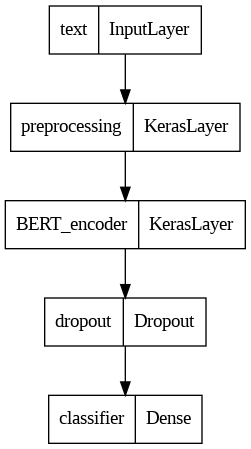

In [ ]:
tf.keras.utils.plot_model(classifier_model)

In [ ]:
loss = tf.keras.losses.BinaryCrossentropy(from_logits=True)
metrics = tf.metrics.BinaryAccuracy()

In [50]:
batch_size=64

import tensorflow as tf
import tensorflow_hub as hub
from official.nlp import optimization

# X_train and X_test are lists of strings
train_dataset = tf.data.Dataset.from_tensor_slices((X_train, y_train)).shuffle(buffer_size=50000).batch(batch_size)
val_dataset = tf.data.Dataset.from_tensor_slices((X_test, y_test)).batch(batch_size)

# Define the BERT model handle for pre-processing and encoding
tfhub_handle_preprocess = "https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3"
tfhub_handle_encoder = "https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-6_H-128_A-2/1"

# Load the BERT pre-processing model from TensorFlow Hub
bert_preprocess_model = hub.KerasLayer(tfhub_handle_preprocess, name='preprocessing')

# Load the BERT encoder model from TensorFlow Hub
bert_encoder_model = hub.KerasLayer(tfhub_handle_encoder, trainable=True, name='BERT_encoder')

# Build the text classification model
text_input = tf.keras.layers.Input(shape=(), dtype=tf.string, name='text')
preprocessed_text = bert_preprocess_model(text_input)
bert_outputs = bert_encoder_model(preprocessed_text)
net = bert_outputs['pooled_output']
net = tf.keras.layers.Dropout(0.1)(net)
classifier_output = tf.keras.layers.Dense(1, activation=None, name='classifier')(net)

classifier_model = tf.keras.Model(inputs=text_input, outputs=classifier_output)

# Define loss function and metrics
loss = tf.keras.losses.BinaryCrossentropy(from_logits=True)
metrics = tf.metrics.BinaryAccuracy()

# Define training parameters
epochs = 3
steps_per_epoch = tf.data.experimental.cardinality(train_dataset).numpy()
num_train_steps = steps_per_epoch * epochs
num_warmup_steps = int(0.1 * num_train_steps)
init_lr = 3e-5

optimizer = optimization.create_optimizer(init_lr=init_lr,
                                          num_train_steps=num_train_steps,
                                          num_warmup_steps=num_warmup_steps,
                                          optimizer_type='adamw')

# Compile the model
classifier_model.compile(optimizer=optimizer, loss=loss, metrics=metrics)

# Train the model
history = classifier_model.fit(
    train_dataset,
    validation_data=val_dataset,
    verbose=2,
    epochs=epochs
)



Epoch 1/3
18/18 - 86s - loss: 0.4533 - binary_accuracy: 0.9185 - val_loss: 0.2185 - val_binary_accuracy: 0.9495 - 86s/epoch - 5s/step
Epoch 2/3
18/18 - 68s - loss: 0.2318 - binary_accuracy: 0.9420 - val_loss: 0.1998 - val_binary_accuracy: 0.9495 - 68s/epoch - 4s/step
Epoch 3/3
18/18 - 70s - loss: 0.2284 - binary_accuracy: 0.9420 - val_loss: 0.1970 - val_binary_accuracy: 0.9495 - 70s/epoch - 4s/step


In [51]:
loss, accuracy = classifier_model.evaluate(val_dataset)

print(f'Loss: {loss}')
print(f'Accuracy: {accuracy}')

5/5 [==============================] - 3s 654ms/step - loss: 0.1970 - binary_accuracy: 0.9495
Loss: 0.1970265805721283
Accuracy: 0.9494584798812866


dict_keys(['loss', 'binary_accuracy', 'val_loss', 'val_binary_accuracy'])


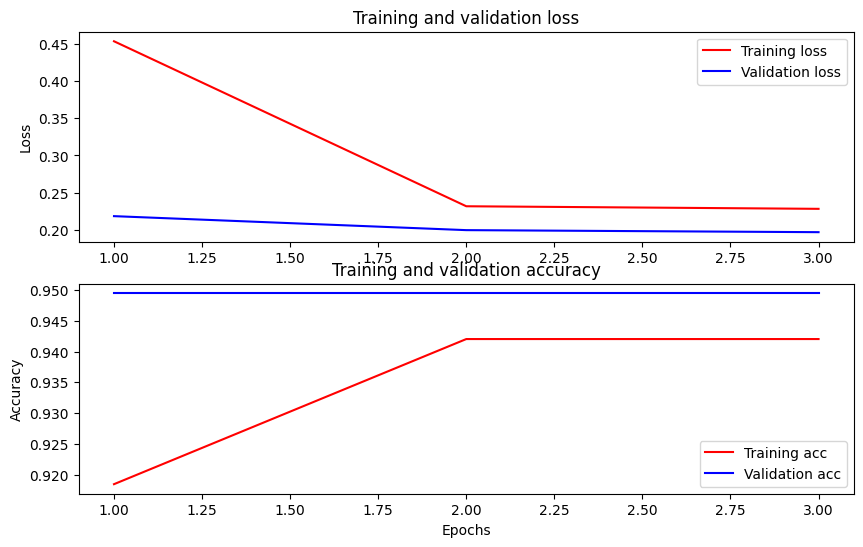

In [52]:
history_dict = history.history
print(history_dict.keys())

acc = history_dict['binary_accuracy']
val_acc = history_dict['val_binary_accuracy']
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(acc) + 1)
fig = plt.figure(figsize=(10, 6))
fig.tight_layout()

plt.subplot(2, 1, 1)
# r is for "solid red line"
plt.plot(epochs, loss, 'r', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
# plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(epochs, acc, 'r', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

In [53]:
dataset_name = 'housing'
saved_model_path = './{}_bert'.format(dataset_name.replace('/', '_'))

classifier_model.save(saved_model_path, include_optimizer=False)

In [54]:
reloaded_model = tf.saved_model.load(saved_model_path)

In [55]:
def print_my_examples(inputs, results):
  result_for_printing = \
    [f'input: {inputs[i]:<30} : score: {results[i][0]:.6f}'
                         for i in range(len(inputs))]
  print(*result_for_printing, sep='\n')
  print()


examples = [
    'What is my campus address, and how do I receive mail?',  # this is the same sentence tried earlier
    'I am a registered student, what does it cost to use your services?',
    'Do I have a curfew in housing?',
    'How do I request a roommate?',
    'Can I live in the residence halls for more than four semesters?'
]

reloaded_results = tf.sigmoid(reloaded_model(tf.constant(examples)))
original_results = tf.sigmoid(classifier_model(tf.constant(examples)))

print('Results from the saved model:')
print_my_examples(examples, reloaded_results)
print('Results from the model in memory:')
print_my_examples(examples, original_results)

Results from the saved model:
input: What is my campus address, and how do I receive mail? : score: 0.042141
input: I am a registered student, what does it cost to use your services? : score: 0.039266
input: Do I have a curfew in housing? : score: 0.038522
input: How do I request a roommate?   : score: 0.044153
input: Can I live in the residence halls for more than four semesters? : score: 0.044880

Results from the model in memory:
input: What is my campus address, and how do I receive mail? : score: 0.042141
input: I am a registered student, what does it cost to use your services? : score: 0.039266
input: Do I have a curfew in housing? : score: 0.038522
input: How do I request a roommate?   : score: 0.044153
input: Can I live in the residence halls for more than four semesters? : score: 0.044880



In [56]:
serving_results = reloaded_model \
            .signatures['serving_default'](tf.constant(examples))

serving_results = tf.sigmoid(serving_results['classifier'])

print_my_examples(examples, serving_results)

input: What is my campus address, and how do I receive mail? : score: 0.042141
input: I am a registered student, what does it cost to use your services? : score: 0.039266
input: Do I have a curfew in housing? : score: 0.038522
input: How do I request a roommate?   : score: 0.044153
input: Can I live in the residence halls for more than four semesters? : score: 0.044880



**Summary**

We were training a BERT machine learning model to classify text questions into different categories.

First we trained the model on some example text data and label data. This taught the model to make predictions.

After training, we saved the full model to disk so we could use it later.

Then we loaded the saved model back into memory.

We wanted to test if saving and reloading worked correctly.

So we gave the same 5 example text questions to both the reloaded model and the original trained model.

We compared the prediction scores each model gave for the questions.

The scores were exactly the same from both models for all the questions.

This means saving and reloading the model worked properly.

The reloaded model makes the exact same predictions as the original trained model.

So we can use the reloaded model in our application to classify new questions.

It will work the same as if we were still using the original model.

Saving and reloading did not change how the model makes predictions.